In [71]:
from google.colab import files
files.upload()

Saving dataset3.csv to dataset3 (1).csv


{'dataset3.csv': b'Company Name,Net Sales,PBIDTM (%),PATM (%),ROE (%),ROCE (%),Asset Turnover(x),Total Debt/Equity(x),Dividend Yield(%),Cons OCF,Cons PAT,OCF/PAT,Ev/EBITDA,M/Sales\r\n3I Infotech Ltd.,1681.02,32.07,-39.82,-70.15,-1.18,0.83,5.61,0.00,-154.46,-360.03,0.43,4.92,0.24\r\n3M India Ltd.,1405.10,17.29,8.81,22.66,32.52,3.54,0.25,0.00,20.89,64.77,0.32,29.25,3.61\r\nAavas Financiers Ltd.,0.29,55.55,2.74,0.03,0.60,0.02,0.00,0.00,-0.64,0.00,-160.45,0.00,0.00\r\nABB India Ltd.,7451.79,10.57,4.96,14.58,24.79,2.37,0.00,1.03,120.00,184.71,0.65,41.88,2.25\r\nAbbott India Ltd.,1490.21,25.88,15.96,56.69,84.84,3.22,0.00,2.33,24.07,120.39,0.20,17.60,2.50\r\nAccelya Solutions India Ltd.,437.52,114.21,65.54,102.75,147.45,4.88,0.02,60.65,88.43,81.57,1.08,2.56,0.84\r\nAegis Logistics Ltd.,4463.83,4.50,1.00,15.71,11.84,5.09,14.47,2.67,-147.17,19.68,-7.48,14.44,0.26\r\nAGC Networks Ltd.,994.60,22.65,12.73,43.40,53.11,2.92,0.80,16.30,-46.20,63.50,-0.73,3.44,0.30\r\nAgro Tech Foods Ltd.,704.54,16.07

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [73]:
data = pd.read_csv('dataset3.csv')

In [74]:
data.head()

,Company Name,Net Sales,PBIDTM (%),PATM (%),ROE (%),ROCE (%),Asset Turnover(x),Total Debt/Equity(x),Dividend Yield(%),Cons OCF,Cons PAT,OCF/PAT,Ev/EBITDA,M/Sales
0,3I Infotech Ltd.,1681.02,32.07,-39.82,-70.15,-1.18,0.83,5.61,0.00,-154.46,-360.03,0.43,4.92,0.24
1,3M India Ltd.,1405.10,17.29,8.81,22.66,32.52,3.54,0.25,0.00,20.89,64.77,0.32,29.25,3.61
2,Aavas Financiers Ltd.,0.29,55.55,2.74,0.03,0.60,0.02,0.00,0.00,-0.64,0.00,-160.45,0.00,0.00
3,ABB India Ltd.,7451.79,10.57,4.96,14.58,24.79,2.37,0.00,1.03,120.00,184.71,0.65,41.88,2.25
4,Abbott India Ltd.,1490.21,25.88,15.96,56.69,84.84,3.22,0.00,2.33,24.07,120.39,0.20,17.60,2.50


In [75]:
test = data.iloc[:,:]

In [76]:
data = data.replace( ' -   ', np.nan)

In [77]:
data.dtypes

Company Name             object
Net Sales               float64
PBIDTM (%)              float64
PATM (%)                float64
ROE (%)                 float64
ROCE (%)                float64
Asset Turnover(x)       float64
Total Debt/Equity(x)    float64
Dividend Yield(%)       float64
Cons OCF                float64
Cons PAT                float64
OCF/PAT                 float64
Ev/EBITDA               float64
M/Sales                 float64
dtype: object

In [78]:
#data.drop(labels='Company Name', axis=1, inplace=True)

In [79]:
data.iloc[:,1:] = data.iloc[:,1:].astype('float64')

In [80]:
data.fillna(data.mean(), inplace=True)

In [81]:
len(data.columns)

14

# **Ev/EBITDA Prediction**

In [82]:
data1 = data.iloc[:,:-1 ]

In [83]:
data1.head()


,Company Name,Net Sales,PBIDTM (%),PATM (%),ROE (%),ROCE (%),Asset Turnover(x),Total Debt/Equity(x),Dividend Yield(%),Cons OCF,Cons PAT,OCF/PAT,Ev/EBITDA
0,3I Infotech Ltd.,1681.02,32.07,-39.82,-70.15,-1.18,0.83,5.61,0.00,-154.46,-360.03,0.43,4.92
1,3M India Ltd.,1405.10,17.29,8.81,22.66,32.52,3.54,0.25,0.00,20.89,64.77,0.32,29.25
2,Aavas Financiers Ltd.,0.29,55.55,2.74,0.03,0.60,0.02,0.00,0.00,-0.64,0.00,-160.45,0.00
3,ABB India Ltd.,7451.79,10.57,4.96,14.58,24.79,2.37,0.00,1.03,120.00,184.71,0.65,41.88
4,Abbott India Ltd.,1490.21,25.88,15.96,56.69,84.84,3.22,0.00,2.33,24.07,120.39,0.20,17.60


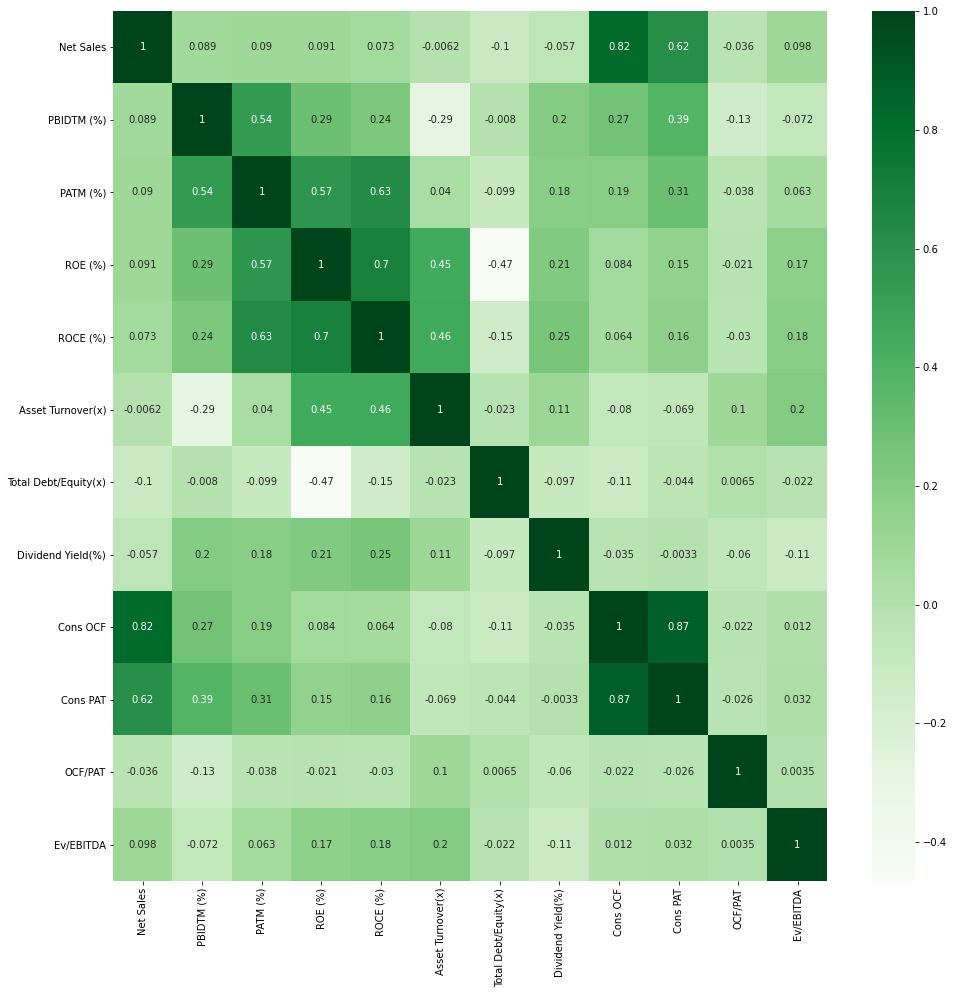

In [84]:
plt.figure(figsize=(16,16))
cor = data1.corr()
sns.heatmap(cor, annot=True, cmap='Greens')
plt.show()

## Selecting most important features:

In [85]:
cor_target = abs(cor["Ev/EBITDA"])
relevant_features = cor_target[cor_target>0.08]
relevant_features.index

Index(['Net Sales', 'ROE (%)', 'ROCE (%)', 'Asset Turnover(x)',
       'Dividend Yield(%)', 'Ev/EBITDA'],
      dtype='object')

In [86]:
X,y = data1[['Net Sales', 'ROE (%)', 'ROCE (%)', 'Asset Turnover(x)',
       'Dividend Yield(%)']], data1['Ev/EBITDA']

In [87]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler


sc_X = StandardScaler()
X = sc_X.fit_transform(X)
'''
mm_X = MinMaxScaler()
X = mm_X.fit_transform(X)
rs_X = RobustScaler()
X = rs_X.fit_transform(X)
'''

'\nmm_X = MinMaxScaler()\nX = mm_X.fit_transform(X)\nrs_X = RobustScaler()\nX = rs_X.fit_transform(X)\n'

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 42)

In [89]:
from sklearn.linear_model import LassoCV
import xgboost as xgb
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ARDRegression
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import LassoLarsCV
from sklearn.svm import SVR
l=[LassoCV(cv=5, random_state=0),
    xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1, alpha = 10, n_estimators = 500),
    RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1]),
    BayesianRidge(compute_score=True),
    ARDRegression(),
    ElasticNetCV(cv=10, random_state=42),
    LassoLarsCV(cv=5),
    SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
]
reg_name = ['LassoCV', 'XGBRegressor', 'RidgeCV', 'BayesianRidge', 'ARDRegression',
            'ElasticNetCV', 'LassoLarsCV', 'SVR']
pred_list = []
for i in l:
    i.fit(X_train,y_train)
    #print(i)
    pred_list.append(i.predict(X_test))

### Mean Squared Error
> Lower the value of error, better the performance

In [90]:
from sklearn.metrics import mean_squared_error
for i,r,p in zip(range(len(reg_name)),reg_name,pred_list):
    #print(r,'\t',mean_squared_error(y_test.values, p))
    
    print('{:2d} {:20s}    {:.10f}'.format(i,r, mean_squared_error(y_test.values, p),))

 0 LassoCV                 37.2686200628
 1 XGBRegressor            104.6970234715
 2 RidgeCV                 37.6789615433
 3 BayesianRidge           35.7947224933
 4 ARDRegression           37.1252860293
 5 ElasticNetCV            36.1368968815
 6 LassoLarsCV             38.7369570313
 7 SVR                     42.8478294197


### R2 Score
> Higher the score, better the model. A perfect model willl have the highest value(i.e 1).

In [ ]:
from sklearn.metrics import r2_score
for i,r,p in zip(range(len(reg_name)),reg_name,pred_list):
    #print(r,'\t',mean_squared_error(y_test.values, p))
    
    print('{:2d} {:20s}    {:.5f}'.format(i,r, r2_score(y_test.values, p)))

 0 LassoCV                 -0.04988
 1 XGBRegressor            -1.94937
 2 RidgeCV                 -0.06144
 3 BayesianRidge           -0.00836
 4 ARDRegression           -0.04584
 5 ElasticNetCV            -0.01800
 6 LassoLarsCV             -0.09124
 7 SVR                     -0.20705


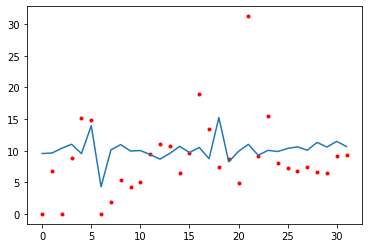

In [ ]:
#plt.subplots(figsize=(12,8))
plt.plot(range(y_test.shape[0]),y_test,'.r')
#plt.plot(range(y_test.shape[0]),y_test,'.r')
plt.plot([i for i in range(len(pred_list[3]))], pred_list[3])


# **M/Sales Prediction**

In [91]:
data2 = data.iloc[:,: ].drop('Ev/EBITDA', axis=1)

In [92]:
data2.head()

,Company Name,Net Sales,PBIDTM (%),PATM (%),ROE (%),ROCE (%),Asset Turnover(x),Total Debt/Equity(x),Dividend Yield(%),Cons OCF,Cons PAT,OCF/PAT,M/Sales
0,3I Infotech Ltd.,1681.02,32.07,-39.82,-70.15,-1.18,0.83,5.61,0.00,-154.46,-360.03,0.43,0.24
1,3M India Ltd.,1405.10,17.29,8.81,22.66,32.52,3.54,0.25,0.00,20.89,64.77,0.32,3.61
2,Aavas Financiers Ltd.,0.29,55.55,2.74,0.03,0.60,0.02,0.00,0.00,-0.64,0.00,-160.45,0.00
3,ABB India Ltd.,7451.79,10.57,4.96,14.58,24.79,2.37,0.00,1.03,120.00,184.71,0.65,2.25
4,Abbott India Ltd.,1490.21,25.88,15.96,56.69,84.84,3.22,0.00,2.33,24.07,120.39,0.20,2.50


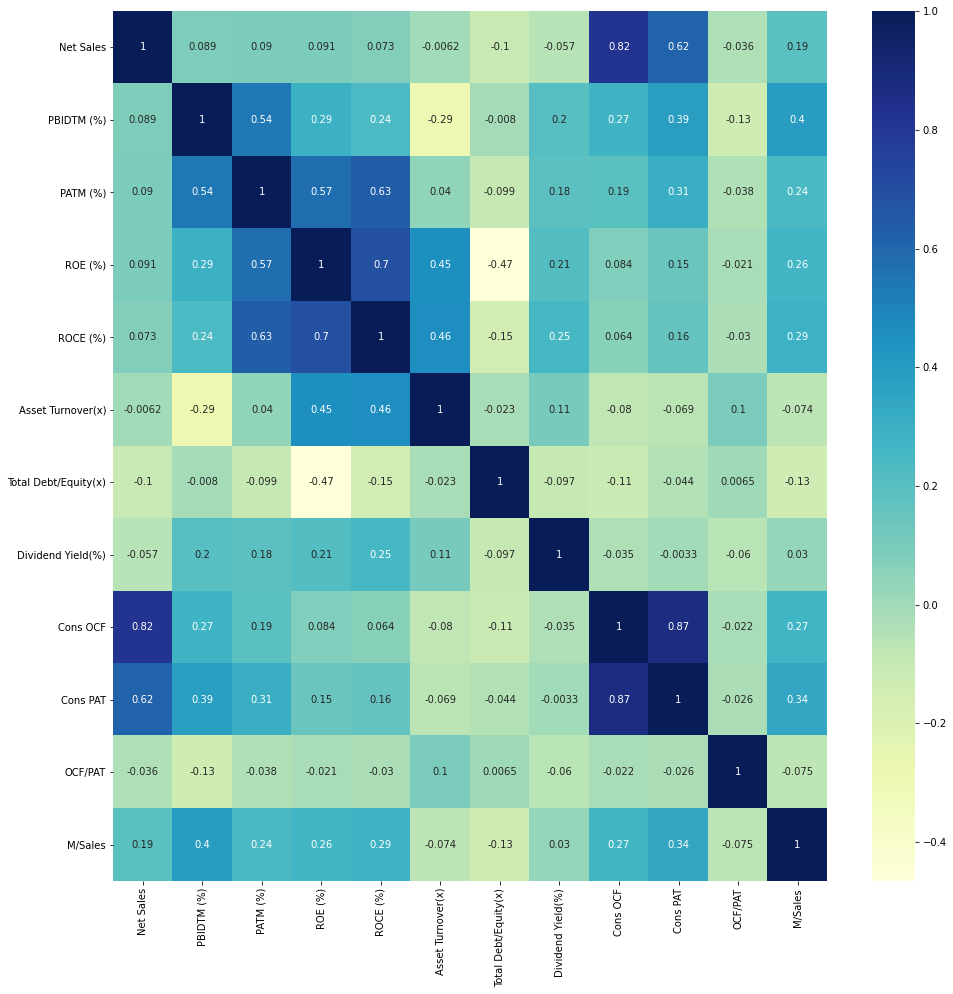

In [93]:
plt.figure(figsize=(16,16))
cor = data2.corr()
sns.heatmap(cor, annot=True, cmap='YlGnBu')
plt.show()

In [ ]:
cor_target = abs(cor["M/Sales"])
relevant_features = cor_target[cor_target>0.25]
relevant_features.index

Index(['PBIDTM (%)', 'ROE (%)', 'ROCE (%)', 'Cons OCF', 'Cons PAT', 'M/Sales'], dtype='object')

In [99]:
X,y = data2[['PBIDTM (%)', 'ROE (%)', 'ROCE (%)', 'Cons OCF', 'Cons PAT']], data2['M/Sales']

In [100]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

sc_X = StandardScaler()
X = sc_X.fit_transform(X)
'''
mm_X = MinMaxScaler()
X = mm_X.fit_transform(X)


rs_X = RobustScaler()
X = rs_X.fit_transform(X)
'''

'\nmm_X = MinMaxScaler()\nX = mm_X.fit_transform(X)\n\n\nrs_X = RobustScaler()\nX = rs_X.fit_transform(X)\n'

In [101]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 42)

In [102]:
from sklearn.linear_model import LassoCV
import xgboost as xgb
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ARDRegression
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import LassoLarsCV
from sklearn.svm import SVR
l=[LassoCV(cv=5, random_state=0),
    xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1, alpha = 10, n_estimators = 500),
    RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1],cv=5),
    BayesianRidge(compute_score=True),
    ARDRegression(),
    ElasticNetCV(cv=10, random_state=42),
    LassoLarsCV(cv=10),
    SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
]
reg_name = ['LassoCV', 'XGBRegressor', 'RidgeCV', 'BayesianRidge', 'ARDRegression',
            'ElasticNetCV', 'LassoLarsCV', 'SVR',]
pred_list = []
for i in l:
    i.fit(X_train,y_train)
    #print(i)
    pred_list.append(i.predict(X_test))

### Mean Squared Error
> Lower the value of error, better the performance

In [98]:
from sklearn.metrics import mean_squared_error
for i,r,p in zip(range(len(reg_name)),reg_name,pred_list):
    #print(r,'\t',mean_squared_error(y_test.values, p))
    
    print('{:2d} {:20s}    {:.5f}'.format(i,r, round(mean_squared_error(y_test.values, p)**0.5,5),))

 0 LassoCV                 1.37597
 1 XGBRegressor            1.63158
 2 RidgeCV                 1.47738
 3 BayesianRidge           1.40513
 4 ARDRegression           1.42859
 5 ElasticNetCV            1.37943
 6 LassoLarsCV             1.40878
 7 SVR                     1.61977


### R2 Score
> Higher the score, better the model. A perfect model willl have the highest value(i.e 1).

In [ ]:
from sklearn.metrics import r2_score
for i,r,p in zip(range(len(reg_name)),reg_name,pred_list):
    #print(r,'\t',mean_squared_error(y_test.values, p))
    
    print('{:2d} {:20s}    {:.5f}'.format(i,r, r2_score(y_test.values, p)))

 0 LassoCV                 -0.09124
 1 XGBRegressor            -1.98501
 2 RidgeCV                 -0.06231
 3 BayesianRidge           -0.01642
 4 ARDRegression           -0.04570
 5 ElasticNetCV            -0.02597
 6 LassoLarsCV             -0.09124
 7 SVR                     -0.40601


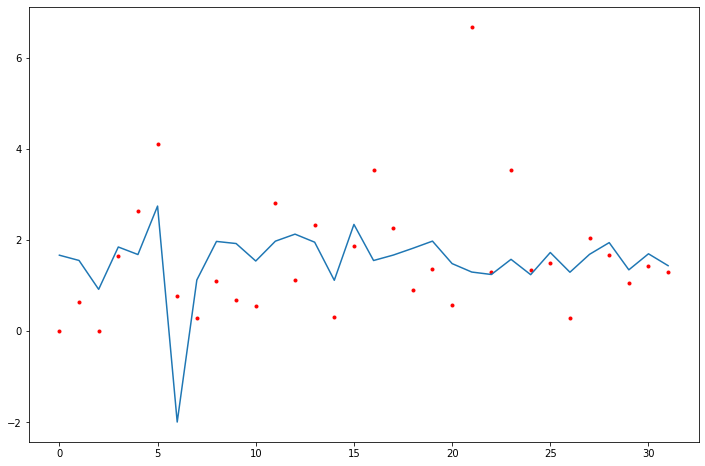

In [103]:
plt.subplots(figsize=(12,8))
plt.plot(range(y_test.shape[0]),y_test,'.r')
#plt.plot(range(y_test.shape[0]),y_test,'.r')
plt.plot([i for i in range(len(pred_list[1]))], pred_list[5])
